# Mini Project 3

## About Dataset

This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

The target RainTomorrow means: Did it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training your binary classification model. If you don't exclude it, you will leak the answers to your model and reduce its predictability. Read more about it here.

## Data Dictionary

Location

The common name of the location of the weather station
MinTemp

The minimum temperature in degrees celsius
MaxTemp

The maximum temperature in degrees celsius
Rainfall

The amount of rainfall recorded for the day in mm
Evaporation

The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine

The number of hours of bright sunshine in the day.
WindGustDir

The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed

The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am

Direction of the wind at 9am
WindDir3pm

Direction of the wind at 3pm
WindSpeed9am

Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm

Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am

Humidity (percent) at 9am
Humidity3pm

Humidity (percent) at 3pm
Pressure9am

Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm

Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am

Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
Cloud3pm

Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
Temp9am

Temperature (degrees C) at 9am
Temp3pm

Temperature (degrees C) at 3pm
RainToday

Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RISK_MM

The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".
RainTomorrow

The target variable. Did it rain tomorrow?

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

from sklearn.preprocessing import StandardScaler

import itertools
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [3]:
df.iloc[:,0:9].head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed  
0           W           44.0  
1         WNW           44.0  
2         WSW           46.0  
3          NE           24.0  
4           W           41.0

In [4]:
df.iloc[:,9:17].head()

WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  
0       1007.7       1007.1  
1       1010.6       1007.8  
2       1007.6       1008.7  
3       1017.6       1012.8  
4       1010.8       1006.0

In [5]:
df.iloc[:,17:25].head()

Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow
0       8.0       NaN     16.9     21.8        No      0.0           No
1       NaN       NaN     17.2     24.3        No      0.0           No
2       NaN       2.0     21.0     23.2        No      0.0           No
3       NaN       NaN     18.1     26.5        No      1.0           No
4       7.0       8.0     17.8     29.7        No      0.2           No

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [7]:
df.Date.unique()

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2008-01-29',
       '2008-01-30', '2008-01-31'], dtype=object)

In [8]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [9]:
df.MinTemp

0         13.4
1          7.4
2         12.9
3          9.2
4         17.5
          ... 
142188     3.5
142189     2.8
142190     3.6
142191     5.4
142192     7.8
Name: MinTemp, Length: 142193, dtype: float64

In [10]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       2.360682  
std        2.887016      2.720633       6.492838       6.937594       8.477969  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [12]:
df_3000 = df.sample(3000)

/home/pug/data_science/DSIA/VE/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/pug/data_science/DSIA/VE/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


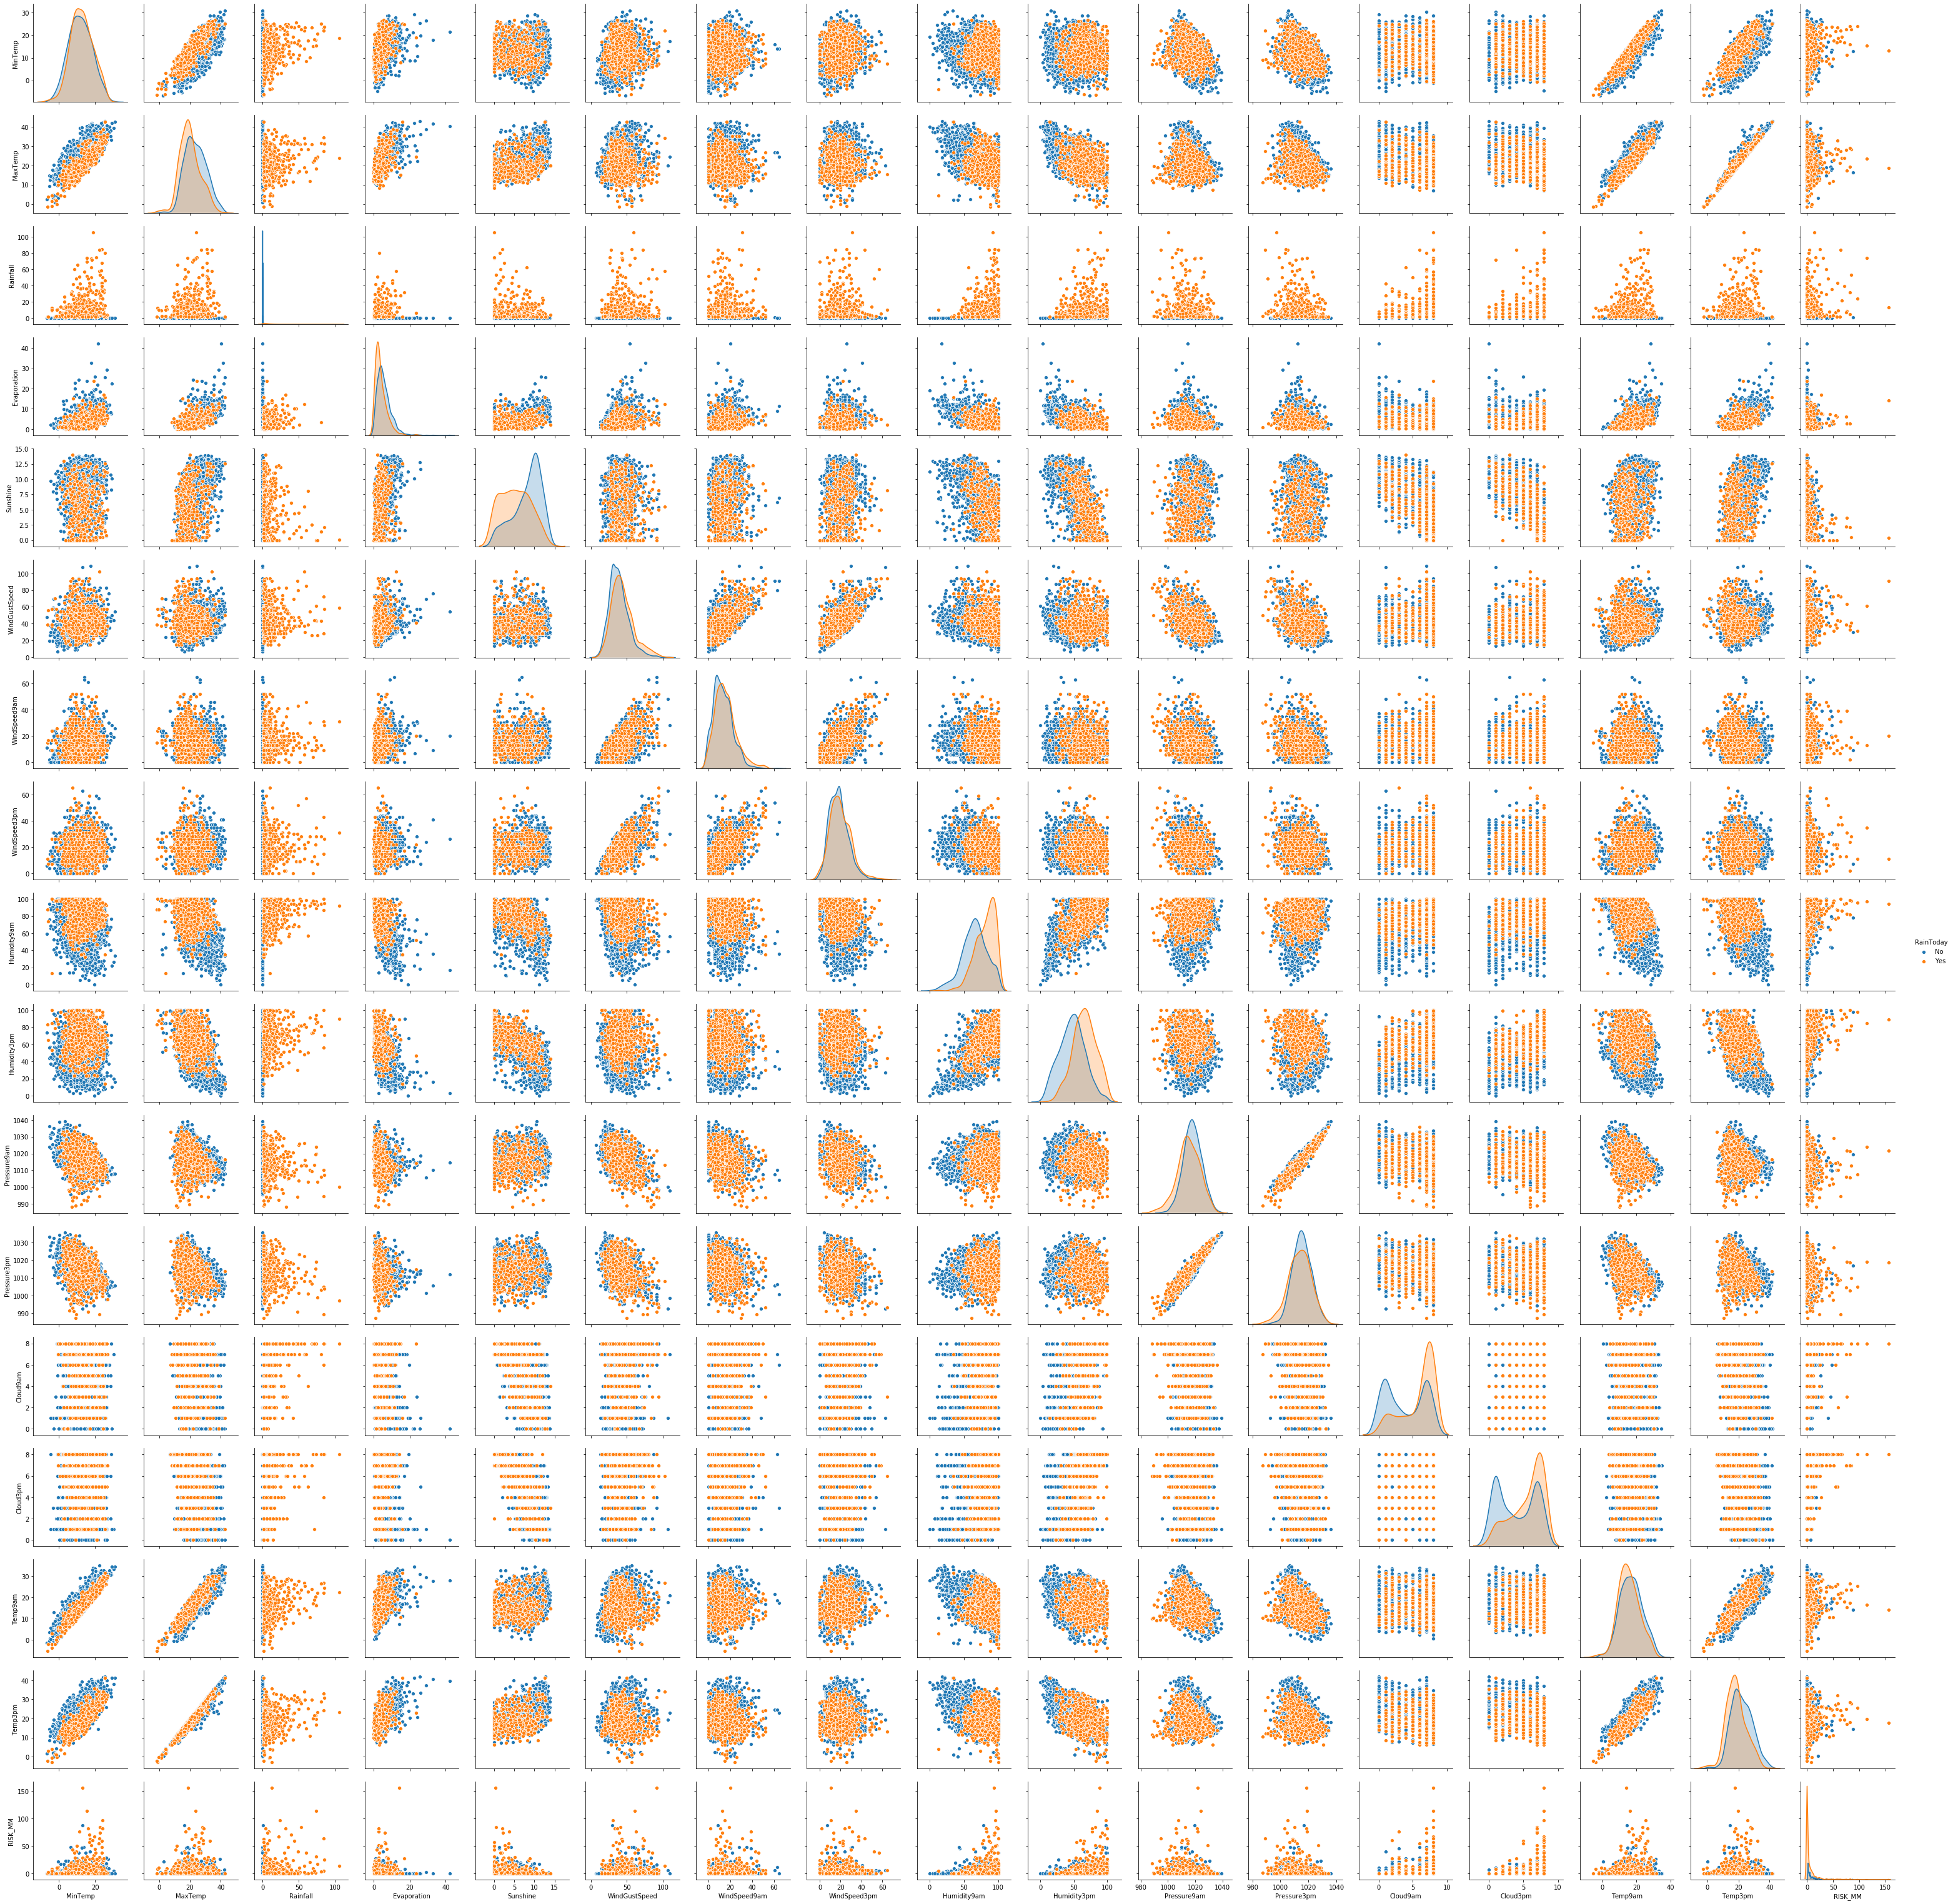

In [13]:
sns.pairplot(df_3000,hue='RainToday')

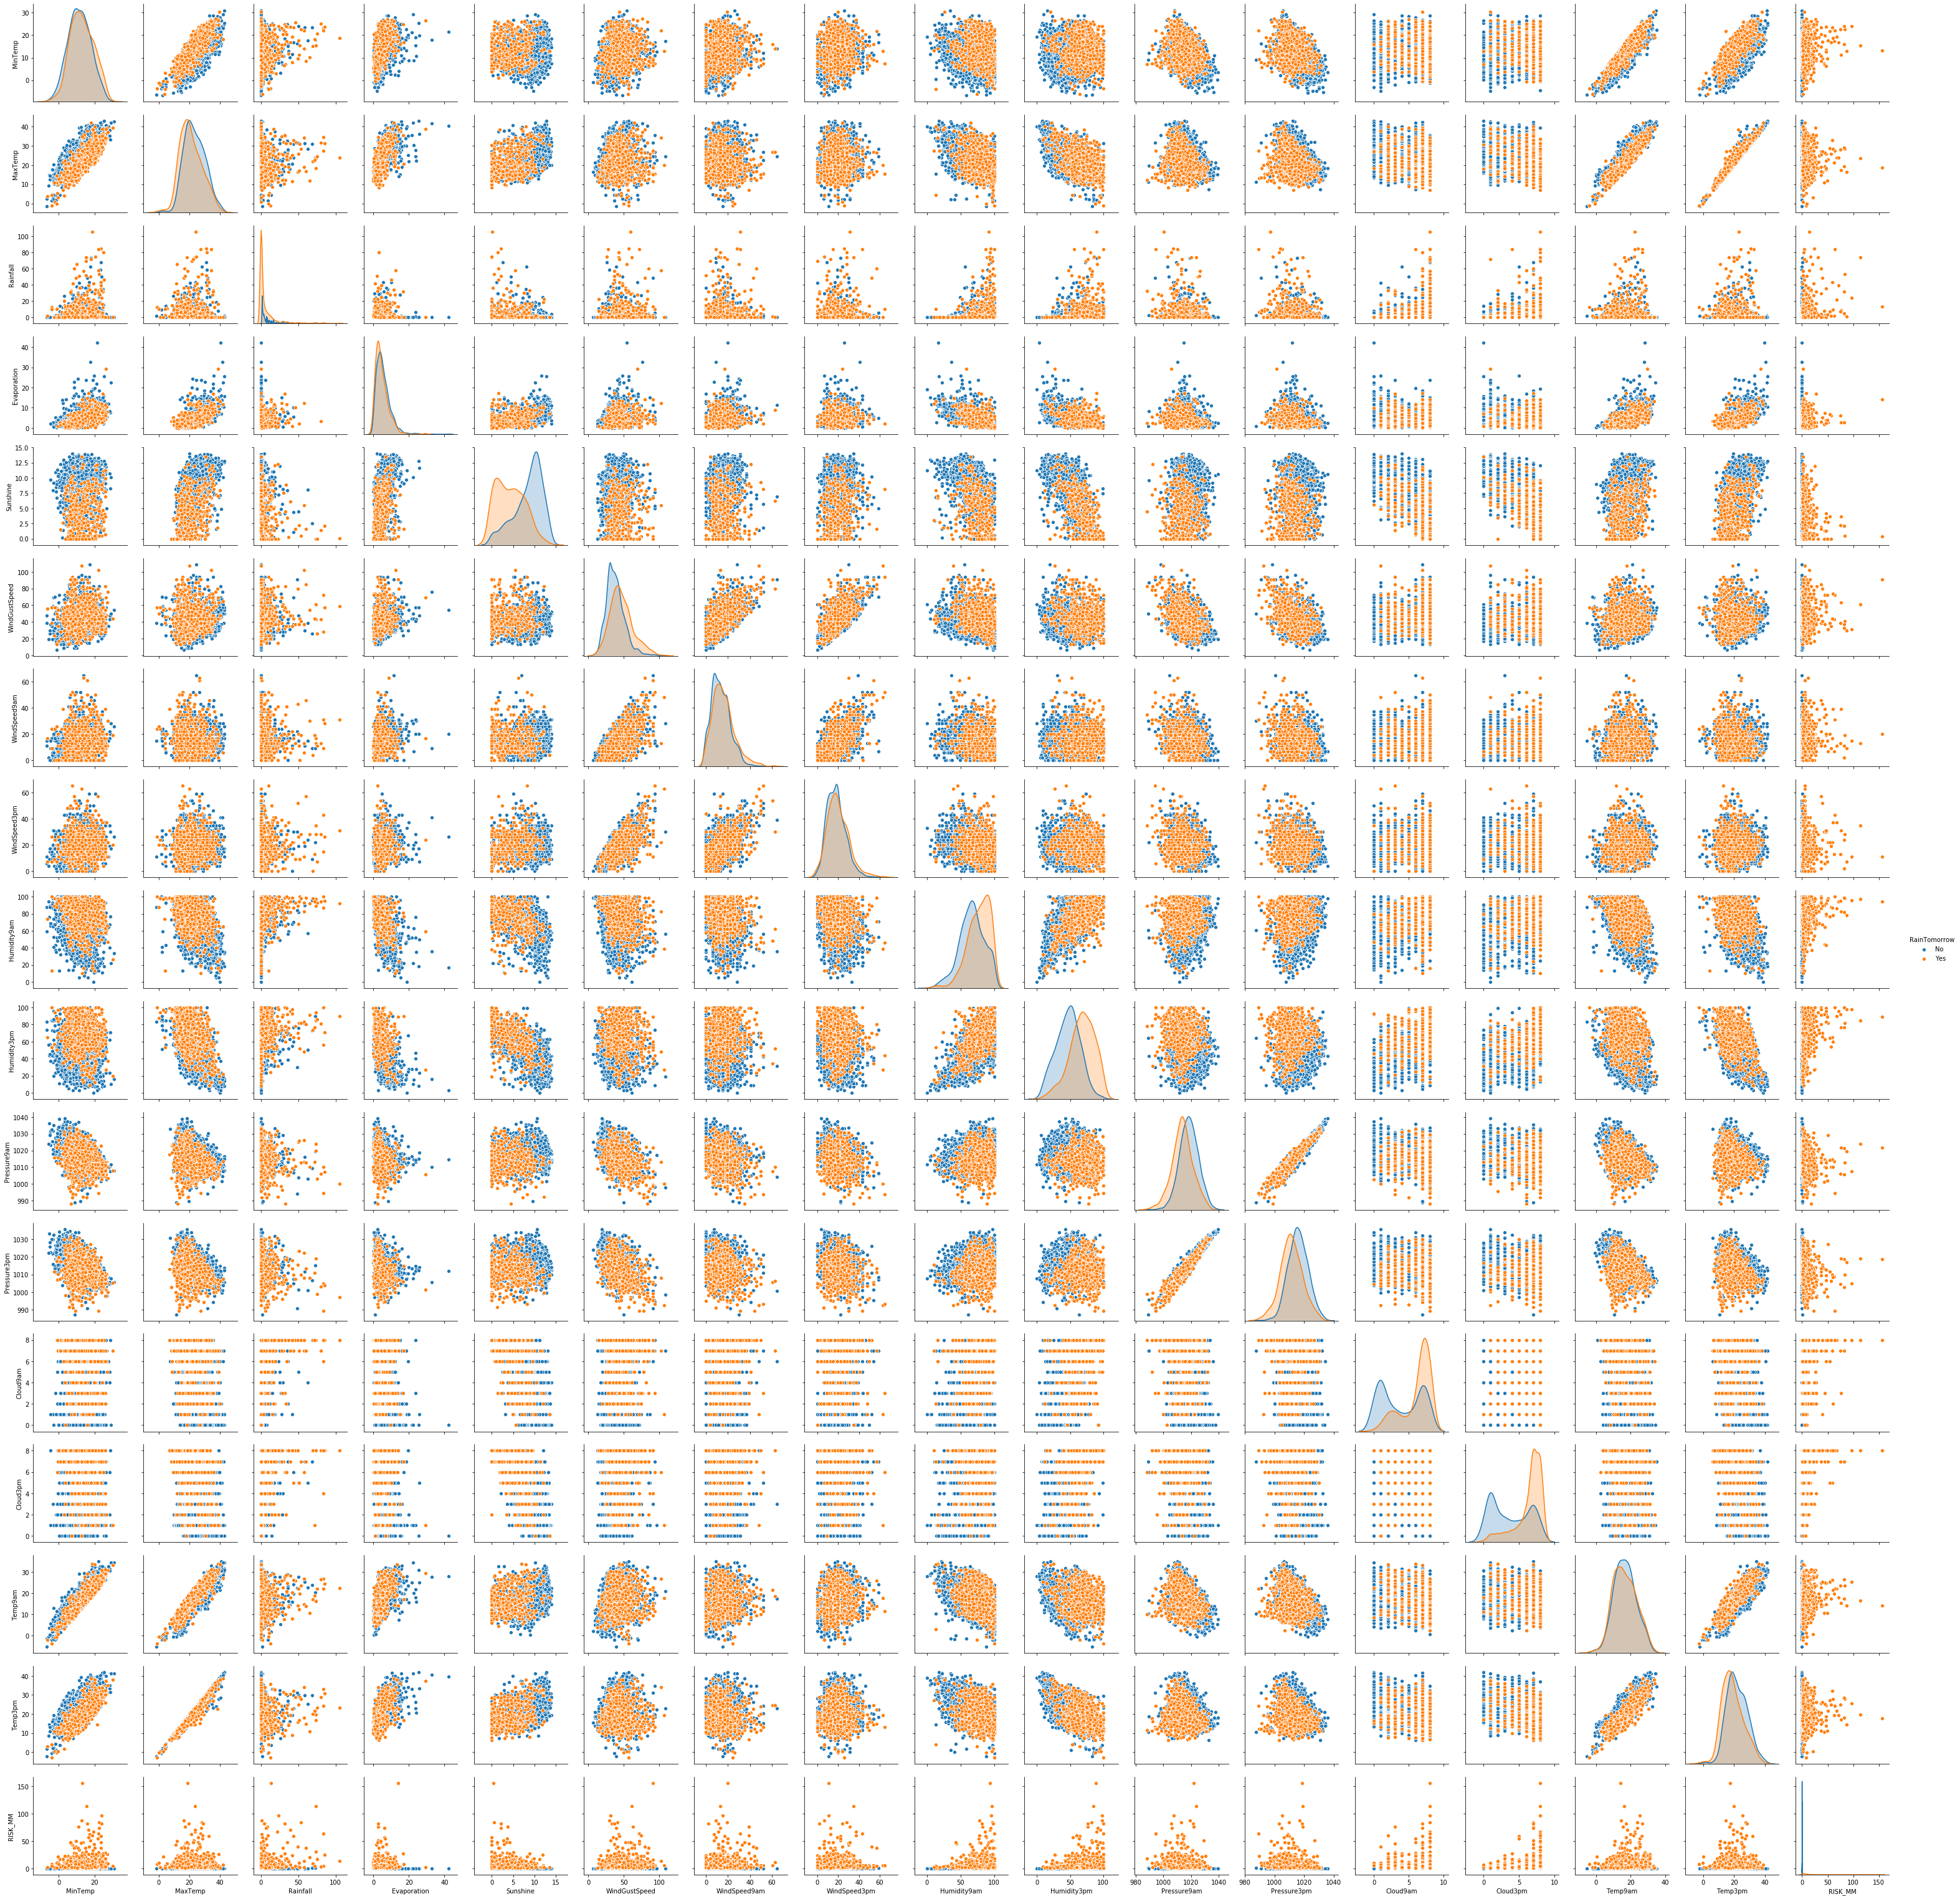

In [14]:
sns.pairplot(df_3000,hue='RainTomorrow')

In [15]:
corr = df.corr()
corr

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736267  0.104255     0.467261  0.072961   
MaxTemp        0.736267  1.000000 -0.074839     0.588915  0.469967   
Rainfall       0.104255 -0.074839  1.000000    -0.064549 -0.227525   
Evaporation    0.467261  0.588915 -0.064549     1.000000  0.366607   
Sunshine       0.072961  0.469967 -0.227525     0.366607  1.000000   
WindGustSpeed  0.177285  0.067690  0.133497     0.203001 -0.032831   
WindSpeed9am   0.176005  0.014680  0.086816     0.193936  0.008040   
WindSpeed3pm   0.175749  0.050800  0.057759     0.128895  0.056012   
Humidity9am   -0.234211 -0.505432  0.223725    -0.505890 -0.491603   
Humidity3pm    0.005999 -0.509270  0.255312    -0.392785 -0.629122   
Pressure9am   -0.451260 -0.332293 -0.168085    -0.269907  0.040959   
Pressure3pm   -0.461623 -0.427279 -0.126728    -0.293160 -0.020464   
Cloud9am       0.077625 -0.289865  0.198195    -0.185032 -0.675610   
Cloud3pm       0.020489 -0.279053  0.171993    -0.184287 -0.704202   
Temp9am        0.901813  0.887020  0.011477     0.545497  0.291139   
Temp3pm        0.708865  0.984562 -0.079178     0.574275  0.490180   
RISK_MM        0.124743 -0.044208  0.308557    -0.043498 -0.294973   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177285      0.176005      0.175749    -0.234211   
MaxTemp             0.067690      0.014680      0.050800    -0.505432   
Rainfall            0.133497      0.086816      0.057759     0.223725   
Evaporation         0.203001      0.193936      0.128895    -0.505890   
Sunshine           -0.032831      0.008040      0.056012    -0.491603   
WindGustSpeed       1.000000      0.604837      0.686419    -0.215461   
WindSpeed9am        0.604837      1.000000      0.519971    -0.270807   
WindSpeed3pm        0.686419      0.519971      1.000000    -0.145942   
Humidity9am        -0.215461     -0.270807     -0.145942     1.000000   
Humidity3pm        -0.026663     -0.031607      0.015903     0.667388   
Pressure9am        -0.457891     -0.227923     -0.295567     0.139519   
Pressure3pm        -0.412922     -0.174916     -0.254988     0.186955   
Cloud9am            0.071235      0.024280      0.052780     0.452182   
Cloud3pm            0.109088      0.053584      0.025269     0.358043   
Temp9am             0.150258      0.129298      0.163601    -0.472826   
Temp3pm             0.032970      0.005108      0.028567    -0.499777   
RISK_MM             0.162923      0.069404      0.049240     0.172417   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.005999    -0.451260    -0.461623  0.077625  0.020489   
MaxTemp          -0.509270    -0.332293    -0.427279 -0.289865 -0.279053   
Rainfall          0.255312    -0.168085    -0.126728  0.198195  0.171993   
Evaporation      -0.392785    -0.269907    -0.293160 -0.185032 -0.184287   
Sunshine         -0.629122     0.040959    -0.020464 -0.675610 -0.704202   
WindGustSpeed    -0.026663    -0.457891    -0.412922  0.071235  0.109088   
WindSpeed9am     -0.031607    -0.227923    -0.174916  0.024280  0.053584   
WindSpeed3pm      0.015903    -0.295567    -0.254988  0.052780  0.025269   
Humidity9am       0.667388     0.139519     0.186955  0.452182  0.358043   
Humidity3pm       1.000000    -0.027449     0.051840  0.517037  0.523270   
Pressure9am      -0.027449     1.000000     0.961348 -0.130081 -0.148139   
Pressure3pm       0.051840     0.961348     1.000000 -0.061152 -0.084963   
Cloud9am          0.517037    -0.130081    -0.061152  1.000000  0.604118   
Cloud3pm          0.523270    -0.148139    -0.084963  0.604118  1.000000   
Temp9am          -0.221467    -0.422773    -0.470325 -0.137843 -0.127869   
Temp3pm          -0.557989    -0.287301    -0.389863 -0.302520 -0.318254   
RISK_MM           0.313183    -0.163673    -0.164184  0.198095  0.234814   

                Temp9am   Temp3pm   RISK_MM  
MinTemp        0.901813  

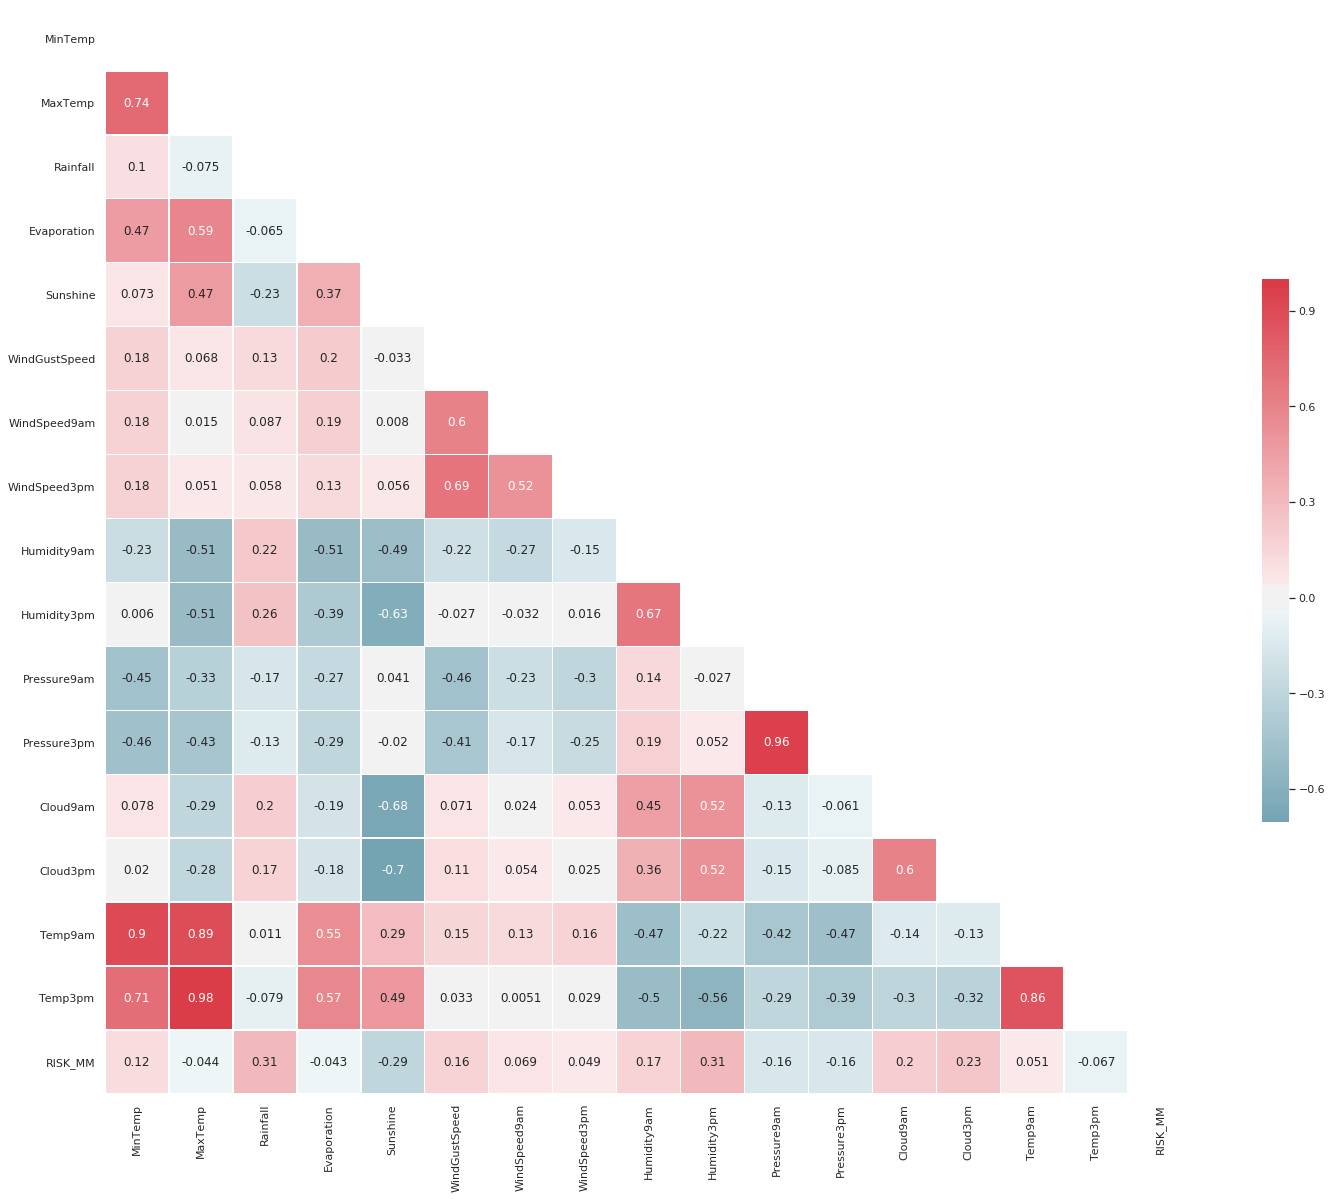

In [16]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [17]:
df_3000.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

## Clean data

Drop the rows with a null value existing. The data is large enough such that still have enough data to work with.

In [18]:
df_3000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 137038 to 30506
Data columns (total 24 columns):
Date             3000 non-null object
Location         3000 non-null object
MinTemp          2993 non-null float64
MaxTemp          2995 non-null float64
Rainfall         2968 non-null float64
Evaporation      1712 non-null float64
Sunshine         1566 non-null float64
WindGustDir      2792 non-null object
WindGustSpeed    2793 non-null float64
WindDir9am       2799 non-null object
WindDir3pm       2909 non-null object
WindSpeed9am     2977 non-null float64
WindSpeed3pm     2944 non-null float64
Humidity9am      2977 non-null float64
Humidity3pm      2926 non-null float64
Pressure9am      2703 non-null float64
Pressure3pm      2697 non-null float64
Cloud9am         1888 non-null float64
Cloud3pm         1814 non-null float64
Temp9am          2991 non-null float64
Temp3pm          2944 non-null float64
RainToday        2968 non-null object
RISK_MM          3000 non-null floa

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [20]:
df0 = df.dropna()

In [21]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 5939 to 139112
Data columns (total 24 columns):
Date             56420 non-null object
Location         56420 non-null object
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null float64
WindDir9am       56420 non-null object
WindDir3pm       56420 non-null object
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null object
RISK_MM      

In [22]:
df0 = df0.drop(columns='RISK_MM',axis=1)

In [23]:
df0.iloc[:,0:12].head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
5939  2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
5940  2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0   
5942  2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
5943  2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   
5944  2009-01-06    Cobar     24.2     41.0       0.0         11.2       8.4   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  
5939         SSW           48.0        ENE         SW           6.0  
5940           S           37.0        SSE        SSE          19.0  
5942         NNE           46.0        NNE        NNW          30.0  
5943         WNW           31.0        WNW        WSW           6.0  
5944         WNW           35.0         NW        WNW          17.0

In [24]:
df0.Location.unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

In [25]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

It is clear the number of locations has decreased significantly and biasing the dataset but will however get something together and see what happens.

## Training the data

Will train a binary classification variable on RainTomorrow on a sample of 5000 for expediency code processing.

In [26]:
df_5000 = df0.sample(5000)

In [27]:
df_5000.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [28]:
df_5000.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [29]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

In [30]:
scaler = StandardScaler()

In [31]:
df_scale = scaler.fit_transform(df_5000[features])

In [32]:
df_5000 = df_5000.reset_index()

In [33]:
norm_df = pd.DataFrame(df_scale,columns = features)
norm_df['RainTomorrow'] = df_5000['RainTomorrow']
norm_df

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0    -1.353059 -1.304329 -0.307741    -1.266376 -1.994275      -1.791116   
1    -0.152665  0.814516 -0.307741     0.819069  1.066258      -0.140982   
2    -1.116139 -0.144691 -0.307741    -0.640743  0.507378      -0.966049   
3     0.668657 -0.645770 -0.277054     1.184022 -1.994275       0.159043   
4     1.553158  0.270488 -0.277054    -0.327926 -2.047502      -1.566098   
...        ...       ...       ...          ...       ...            ...   
4995  0.937166  0.284804 -0.246367    -0.015109 -1.541849       0.834098   
4996  0.021076 -0.774618 -0.307741     0.245572  0.267858      -0.741031   
4997 -1.037166 -0.989366  0.029819    -0.953560 -0.876515      -1.416086   
4998 -1.542595 -0.287857 -0.307741     0.454116  0.959804       0.009031   
4999 -0.863424 -1.218430  0.367379    -1.109968 -1.249102       1.134123   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0        -1.037358     -1.266103     1.462400     0.062417     1.405046   
1         0.158306      0.253772    -1.377580    -1.286012    -0.405708   
2         0.158306     -0.096968     0.404369    -0.037466     0.747918   
3        -0.798225     -0.798449    -0.096804     1.460788     0.149200   
4        -1.635190     -2.084497     0.682798     1.310963    -0.683163   
...            ...           ...          ...          ...          ...   
4995      1.234404      2.007475     0.738484     1.211079    -0.493325   
4996      0.756138     -0.330795    -0.375234    -0.237234     1.127592   
4997     -1.156925     -1.032276     1.907888     0.611777     0.850138   
4998      0.158306     -0.096968    -0.653663    -0.886477     0.806329   
4999      0.158306      0.955253     1.462400     1.860323     0.382846   

      Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm RainTomorrow  
0        1.463376  0.990352  1.030192 -1.434638 -1.169481           No  
1       -0.647152 -1.172461 -1.270884  0.585679  0.757691           No  
2        0.554676 -1.172461 -1.270884 -0.617258 -0.132896           No  
3        0.540020  1.350821  1.413704  0.030477 -1.140281          Yes  
4       -0.661809  0.990352  1.030192  1.187148  0.348897          Yes  
...           ...       ...       ...       ...       ...          ...  
4995    -0.222115  0.990352  1.413704  0.554835 -0.089097           No  
4996     1.243529  0.990352 -0.120346 -0.308812 -0.804486           No  
4997     0.994369  1.350821  0.646679 -1.342105 -0.921284           No  
4998     0.701241 -0.091054 -0.120346 -0.740636 -0.191295           No  
4999     0.378799  0.990352  1.030192 -0.925703 -1.417677          Yes  

[5000 rows x 17 columns]

In [34]:
norm_df[['RT_no','RT_yes']]=pd.get_dummies(norm_df['RainTomorrow'])

In [35]:
norm_df['RT_yes'].sum()

1121

In [36]:
norm_df['RT_yes'].mean()

0.2242

In [37]:
norm_df['RT_no'].mean()

0.7758

In [38]:
norm_df.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0 -1.353059 -1.304329 -0.307741    -1.266376 -1.994275      -1.791116   
1 -0.152665  0.814516 -0.307741     0.819069  1.066258      -0.140982   
2 -1.116139 -0.144691 -0.307741    -0.640743  0.507378      -0.966049   
3  0.668657 -0.645770 -0.277054     1.184022 -1.994275       0.159043   
4  1.553158  0.270488 -0.277054    -0.327926 -2.047502      -1.566098   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0     -1.037358     -1.266103     1.462400     0.062417     1.405046   
1      0.158306      0.253772    -1.377580    -1.286012    -0.405708   
2      0.158306     -0.096968     0.404369    -0.037466     0.747918   
3     -0.798225     -0.798449    -0.096804     1.460788     0.149200   
4     -1.635190     -2.084497     0.682798     1.310963    -0.683163   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm RainTomorrow  RT_no  \
0     1.463376  0.990352  1.030192 -1.434638 -1.169481           No      1   
1    -0.647152 -1.172461 -1.270884  0.585679  0.757691           No      1   
2     0.554676 -1.172461 -1.270884 -0.617258 -0.132896           No      1   
3     0.540020  1.350821  1.413704  0.030477 -1.140281          Yes      0   
4    -0.661809  0.990352  1.030192  1.187148  0.348897          Yes      0   

   RT_yes  
0       0  
1       0  
2       0  
3       1  
4       1

## Train a baseline model without tweaking hyperparameters

In [39]:
np.random.seed(2534)
X = norm_df[features]
y = norm_df.RT_yes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [40]:
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()

In [41]:
print(clf1.fit(X_train, y_train))
print(clf2.fit(X_train,y_train))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [42]:
print(clf1.score(X_train, y_train))
print(clf2.score(X_train,y_train))

1.0
1.0


In [43]:
print(clf1.score(X_test, y_test))
print(clf2.score(X_test,y_test))

0.753
0.82


In [44]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

*****************
* Decision Tree *
*****************
Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


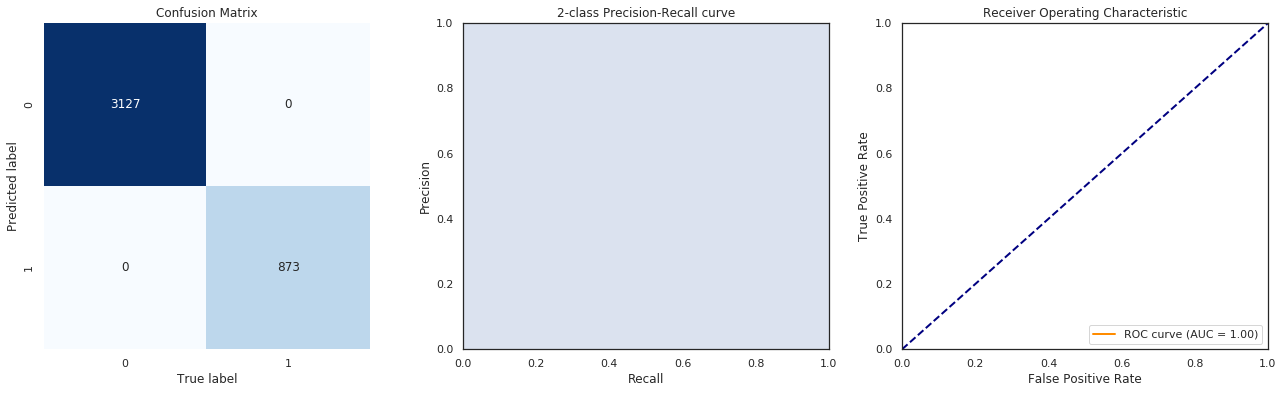


*****************
* Random Forest *
*****************
Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


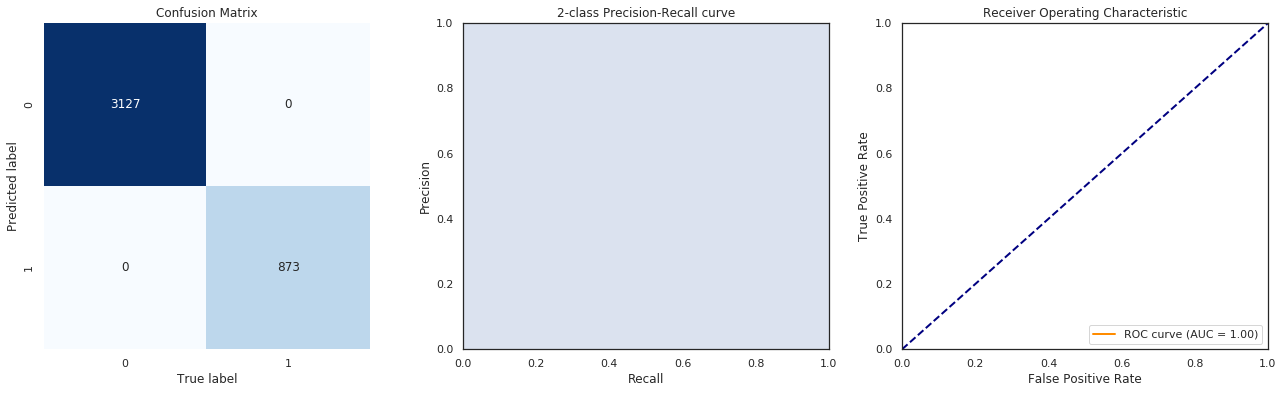

In [45]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'Random Forest']
for i, m in enumerate([clf1,clf2]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_train)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

*****************
* Decision Tree *
*****************
Accuracy : 0.7530 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5020 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5121 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6723                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


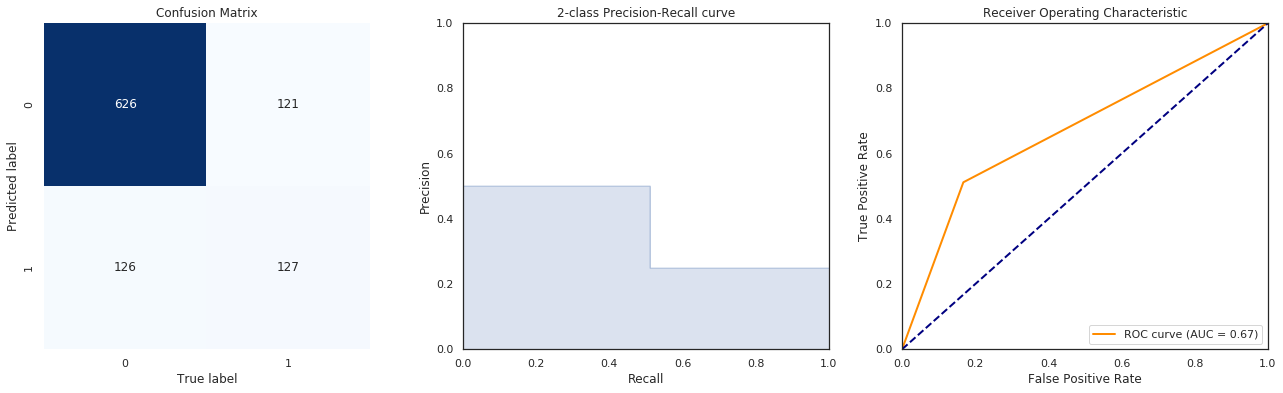


*****************
* Random Forest *
*****************
Accuracy : 0.8200 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7048 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4718 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7033                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


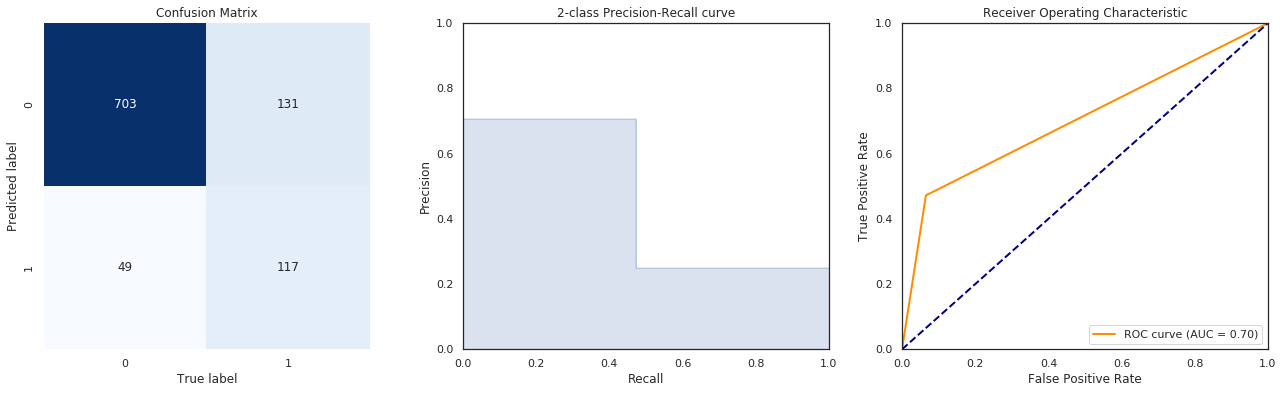

In [46]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'Random Forest']
for i, m in enumerate([clf1,clf2]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_test)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

## Will try to optimise hyperparameter set for both models

In [47]:
params = {'criterion':('gini', 'entropy'), 'max_depth':[None,20,50,100,200,500,1000],'min_samples_split':[2,8,32,64],'max_leaf_nodes':[None,20,50,100,200,500,1000]}

In [48]:
clf11 = DecisionTreeClassifier()
clf22 = RandomForestClassifier()

In [49]:
cv11 = GridSearchCV(clf11,params)

In [50]:
cv11.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                

In [51]:
cv11.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_leaf_nodes': 20,
 'min_samples_split': 2}

In [52]:
cv11.best_estimator_.score(X_train,y_train)

0.8515

In [53]:
cv11.best_estimator_.score(X_test,y_test)

0.815

In [54]:
clf22 = RandomForestClassifier(criterion='gini',max_depth=None,max_leaf_nodes=20,min_samples_split=64)

In [55]:
params2 = {'n_estimators':[10,50,100,500,1000]}

In [56]:
cv22 = GridSearchCV(clf22,params2)

In [57]:
cv22.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=20,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=64,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ran

In [58]:
cv22.best_params_

{'n_estimators': 500}

In [59]:
cv22.best_estimator_.score(X_train,y_train)

0.86825

In [60]:
cv22.best_estimator_.score(X_test,y_test)

0.824

*****************
* Decision Tree *
*****************
Accuracy : 0.8150 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6981 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4476 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6919                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


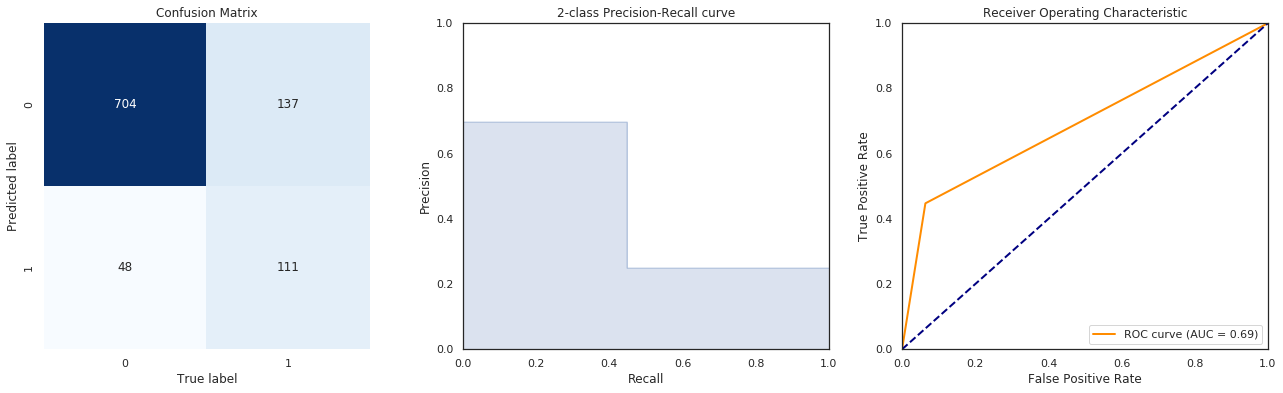


*****************
* Random Forest *
*****************
Accuracy : 0.8240 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7466 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4395 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6952                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


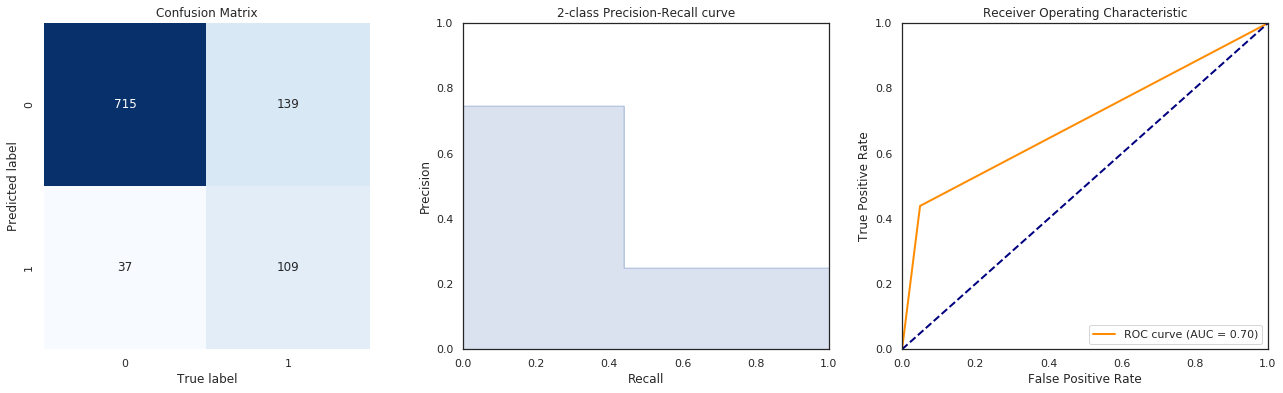

In [61]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'Random Forest']
for i, m in enumerate([cv11.best_estimator_,cv22.best_estimator_]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_test)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()